# Ejercicio 4

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats

Leemos los archivos de datos

In [3]:
G_internet=nx.read_gml('as-22july06.gml')

In [4]:
G_colaboraciones=nx.read_gml('netscience.gml')

Calculamos el grado medio de los vecinos de cada uno de los nodos

In [5]:
def grado_vecinos(G):
    A = nx.adjacency_matrix(G)  # Matriz de adycencia
    i=0
    vector_grado=[]
    grado_medio_vecinos=[]
    cantidad_nodos = G.number_of_nodes()
    while i<cantidad_nodos:
        j=0
        acumula_grado_vecinos = 0
        vecinos = list(G.degree)[i][1]
        if (vecinos>0):
            vector_grado += [vecinos]
            while j<cantidad_nodos:
                if (A[i,j]==1):
                    acumula_grado_vecinos +=list(G.degree)[j][1]
                j+=1
            grado_medio_vecinos+=[acumula_grado_vecinos/float(vecinos)]
        i+=1
    return (vector_grado,grado_medio_vecinos)

In [6]:
resultados_G_colaboraciones=grado_vecinos(G_colaboraciones)

In [7]:
def knn_k(vector_grado,grado_medio_vecinos):
    i=0
    knn_tmp = np.zeros(max(vector_grado)+1)
    vector_N = np.zeros(max(vector_grado)+1)
    
    while i<len(vector_grado):
        indice = vector_grado[i]
        knn_tmp[indice]+=grado_medio_vecinos[i]
        vector_N[indice]+=1
        i+=1
    
    i=0
    knn_k = np.zeros(max(vector_grado)+1)

    while i<len(knn_k):
        if(vector_N[i]>0.0):
            knn_k[i]=knn_tmp[i]/float(vector_N[i])
        else:
            knn_k[i]=0.0
        i+=1
    return(knn_k)        

In [8]:
res=knn_k(resultados_G_colaboraciones[0],resultados_G_colaboraciones[1])

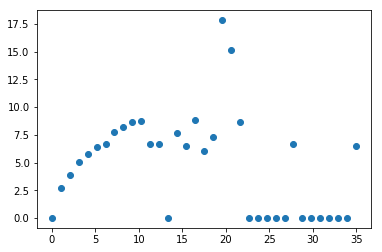

In [9]:
vector_k=np.linspace(0,len(res),len(res))

plt.plot(vector_k,res,'o')
#plt.gca().set_xscale("log")
#plt.gca().set_yscale("log")
plt.show()

In [10]:
from scipy import stats
kmax = 11
xlog = np.log(vector_k[1:kmax])
ylog = np.log(res[1:kmax])

slope, intercept, r_value, p_value, std_err = stats.linregress(xlog, ylog)

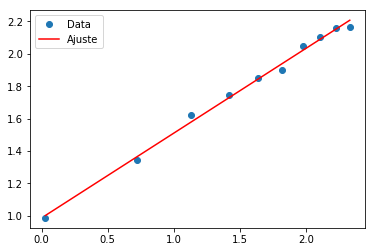

In [11]:
plt.plot(xlog, ylog, 'o', label='Data')
plt.plot(xlog, intercept + slope*xlog, 'r', label='Ajuste')
plt.legend()
plt.show()

In [12]:
slope

0.5233324179642919

Como el exponente de correlación es mayor a cero (0.52) la red de colaboraciones científicas es asortativa.

In [13]:
r_value**2

0.9945787316483126

Estimador de Newman

In [56]:
def S(G):
    A = nx.adjacency_matrix(G)  # Matriz de adycencia
    cantidad_nodos = G.number_of_nodes()
    i = 0
    S1 = 0
    S2 = 0
    S3 = 0
    while i<cantidad_nodos:
        S1 += list(G.degree)[i][1]
        S2 += list(G.degree)[i][1]**2
        S3 += list(G.degree)[i][1]**3   
        i+=1
    resultado=[S1,S2,S3]
    return resultado

In [57]:
def se(G):
    i=0
    se = 0.0
    while i< len(list(G.edges)):
        nombre_1 =  list(G_colaboraciones.edges)[i][0]
        k_1 = G.degree()[nombre_1]
        nombre_2 =  list(G_colaboraciones.edges)[i][1]
        k_2 = G.degree()[nombre_2]
        se+=k_1*k_2
        i+=1
    return 2*se

In [58]:
vector_S_colaboraciones = S(G_colaboraciones)
vector_S_colaboraciones += [se(G_colaboraciones)]

In [59]:
def r(vector_S):
    numerador = vector_S[0]*vector_S[3]-vector_S[1]**2
    denominador = vector_S[0]*vector_S[2]-vector_S[1]**2
    r = numerador/float(denominador)
    return r

In [60]:
r(vector_S_colaboraciones)

0.4616224667525835